In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [29]:
img = cv2.imread('../DATA/car_plate.jpg')

In [30]:
def display_img(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

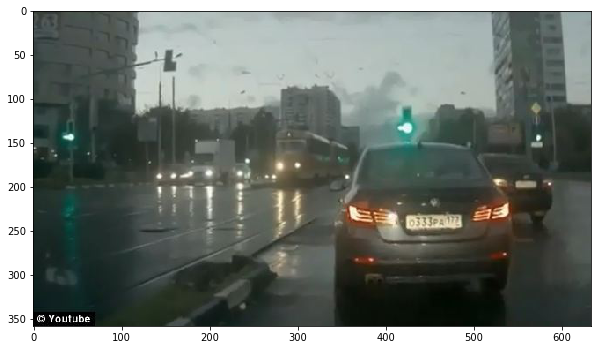

In [31]:
display_img(img)

In [32]:
plate_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_russian_plate_number.xml')

In [33]:
def detect_plate(img):
    plate_img = img.copy()
    
    plate_rects = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.3, minNeighbors=3)
    
    for(x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img, (x,y), (x+w, y+h), (0,255,0), 4)
    return plate_img

In [34]:
result = detect_plate(img)

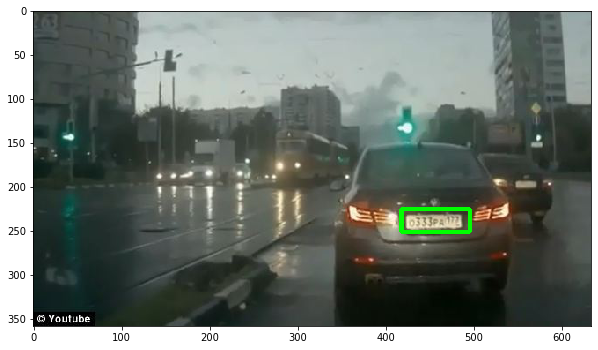

In [40]:
display_img(result)

In [37]:
def detect_and_blur_plate(img):
    plate_img = img.copy()
    roi = img.copy()
    
    plate_rects = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.3, minNeighbors=3)
    
    for (x,y,w,h) in plate_rects:
        
        roi = roi[y:y+h, x:x+w]
        blurred_roi = cv2.medianBlur(roi, 7)
        plate_img[y:y+h, x:x+w] = blurred_roi
    return plate_img

In [ ]:
display_img(detect_and_blur_plate(img))